In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from pydataset import data
from sklearn.ensemble import RandomForestClassifier
import prepare
import acquire


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = acquire.new_titanic_data()

In [3]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [4]:
train, validate, test = prepare.prep_titanic_data(df)

In [5]:

train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [6]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0


In [7]:
train = train.drop(columns=['sex', 'embark_town'])

In [8]:
validate = validate.drop(columns=['sex', 'embark_town'])

In [9]:
test = test.drop(columns=['sex', 'embark_town'])

In [10]:
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [11]:
train.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,36.000000,0,0,40.1250,1,1,0,0
165,1,3,9.000000,0,2,20.5250,0,1,0,1
50,0,3,7.000000,4,1,39.6875,0,1,0,1
259,1,2,50.000000,0,1,26.0000,0,0,0,1
306,1,1,29.678105,0,0,110.8833,1,0,0,0


In [12]:
X_train = train.drop(columns='survived')
y_train = train['survived']

X_validate = validate.drop(columns='survived')
y_validate = validate['survived']

X_test = test.drop(columns='survived')
y_test = test['survived']

In [13]:
seed=123

rf = RandomForestClassifier(max_depth=10, random_state=123,
                            min_samples_leaf=1)

In [14]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [15]:
rf.score(X_validate, y_validate)

0.8130841121495327

In [16]:
y_predictions = rf.predict(X_train)


2. Evaluate your results using the model score, confusion matrix, and classification report.

In [17]:
acc = rf.score(X_train, y_train)
acc

0.9698795180722891

In [18]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
      .format(rf.score(X_train, y_train)))

Accuracy of Random Forest classifier on training set: 0.97


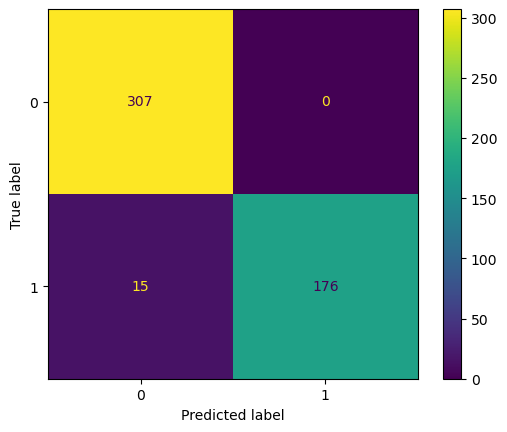

In [19]:
plot_confusion_matrix(rf, X_train, y_train)

In [20]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       307
           1       1.00      0.92      0.96       191

    accuracy                           0.97       498
   macro avg       0.98      0.96      0.97       498
weighted avg       0.97      0.97      0.97       498



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [21]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP

(307, 0, 15, 176)

In [22]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 307
Positive Cases: 191
0    307
1    191
Name: survived, dtype: int64


In [23]:
# accuracy
ALL = TP + FP + FN + TN
acc = (TP + TN) / ALL
# true positive rate, also recall
TPR = recall = TP/ (TP + FN)
# false positive rate
FPR = FP / (FP + TN)
# true negative rate
TNR = TN / (TN + FP)
# false negative rate
FNR = FN / (FN + TP)
# precision
precision = TP / (TP + FP)
# f1
f1_score = 2 * (precision*recall) / (precision+recall)
# support
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {acc}", '\n')
print(f"True Positive Rate/Recall: {TPR}", '\n')
print(f"False Positive Rate: {FPR}", '\n')
print(f"True Negative Rate: {TNR}", '\n')
print(f"False Negative Rate: {FNR}", '\n')
print(f"Precision: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.9698795180722891 

True Positive Rate/Recall: 0.9214659685863874 

False Positive Rate: 0.0 

True Negative Rate: 1.0 

False Negative Rate: 0.07853403141361257 

Precision: 1.0 

F1 Score: 0.9591280653950953 

Support (0): 307 

Support (1): 191


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [26]:
for i in range(1, 11):
    for o in range(10, -6, -1):
        rf = RandomForestClassifier(max_depth=10, random_state=seed,
                                min_samples_leaf=i)

        rf.fit(X_train, y_train)
    
        y_predicitons = rf.predict(X_train)
        
        report = classification_report(y_train,
                                      y_predictions,
                                      output_dct=True)

        print(f"Tree with {i}. Train accuracy: {train_acc}. Validation accuracy: {val_acc}.")
        print()
        print('---------------------------------------------')
        print()

Max depth of 10. Train accuracy: 0.9196787148594378. Validation accuracy: 0.8271028037383178.

---------------------------------------------

Max depth of 9. Train accuracy: 0.9156626506024096. Validation accuracy: 0.8271028037383178.

---------------------------------------------

Max depth of 8. Train accuracy: 0.9176706827309237. Validation accuracy: 0.8177570093457944.

---------------------------------------------

Max depth of 7. Train accuracy: 0.9076305220883534. Validation accuracy: 0.8037383177570093.

---------------------------------------------

Max depth of 6. Train accuracy: 0.8835341365461847. Validation accuracy: 0.8130841121495327.

---------------------------------------------

Max depth of 5. Train accuracy: 0.8614457831325302. Validation accuracy: 0.794392523364486.

---------------------------------------------

Max depth of 4. Train accuracy: 0.857429718875502. Validation accuracy: 0.7990654205607477.

---------------------------------------------

Max depth of 3

ValueError: max_depth must be greater than zero. 

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [28]:
metrics = []

for i in range(2, 25):
    # Make the model
    tree = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_train_predictions = tree.predict(X_train)
    
    y_validate_predictions = tree.predict(X_validate)
    
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
# turn metrics into a datafram    
df = pd.DataFrame(metrics)
# 
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.817269,0.775701,0.041568
1,3,0.841365,0.785047,0.056319
2,4,0.855422,0.794393,0.061029
3,5,0.861446,0.808411,0.053035
4,6,0.893574,0.803738,0.089836
5,7,0.933735,0.817757,0.115978
6,8,0.945783,0.808411,0.137372
7,9,0.957831,0.803738,0.154093
8,10,0.969880,0.813084,0.156795
9,11,0.977912,0.817757,0.160155


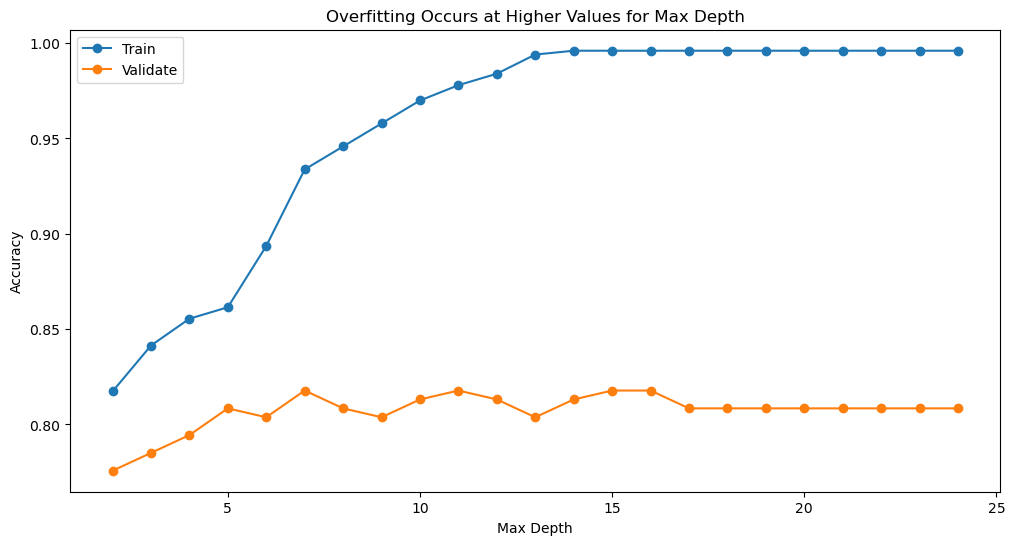

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
3,5,0.861446,0.808411,0.053035
4,6,0.893574,0.803738,0.089836
2,4,0.855422,0.794393,0.061029
1,3,0.841365,0.785047,0.056319
0,2,0.817269,0.775701,0.041568
